In [1]:
import pandas as pd
import time
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
%matplotlib inline

## 统计缺失的问题

In [83]:
wheat13 = pd.read_pickle('./data/185day_data13.df')

In [84]:
wheat13.groupby('Location').apply(lambda x: x.Date.max() - x.Date.min()).value_counts()

185 days    935
184 days      6
152 days      6
182 days      3
dtype: int64

数据中首尾两条数据时间差与DayINSeason不符删去不足185天的数据

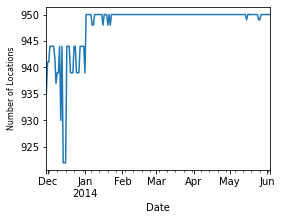

In [95]:
plt.figure(figsize=(4, 3))
wheat13.groupby('Date').Location.count().plot()
plt.ylabel('Number of Locations', fontsize=8)
plt.savefig('./figures/date&locations(origin).png', dpi=600, bbox_inches = 'tight')

In [86]:
days = wheat13.groupby('Location').apply(lambda x: x.Date.max() - x.Date.min())

In [87]:
clean_pos = days[days == timedelta(days=185)].index.to_list()

In [88]:
wheat13_185days_nonmiss = wheat13[wheat13.Location.isin(clean_pos)]

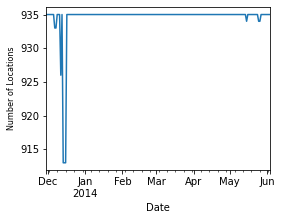

In [89]:
plt.figure(figsize=(4, 3))
wheat13_185days_nonmiss.groupby('Date').Location.count().plot()
plt.ylabel('Number of Locations', fontsize=8)
plt.savefig('./figures/date&locations.png', dpi=600, bbox_inches = 'tight')

In [90]:
wheat13_185days_nonmiss.groupby('Location')['DayInSeason'].unique().apply(lambda x: len(x)).value_counts()

186    901
183     23
185      9
184      2
Name: DayInSeason, dtype: int64

收尾时间差无差错，但是统计的过程中依然有位置跳了天

In [91]:
days = wheat13.groupby('Location')['DayInSeason'].unique().apply(lambda x: len(x))
clean_pos = days[days==186].index.to_list()

In [92]:
wheat13_185days_nonmiss = wheat13[wheat13.Location.isin(clean_pos)]

In [93]:
wheat13_185days_nonmiss.to_pickle('./data/wheat13_185days_nonmiss.df')

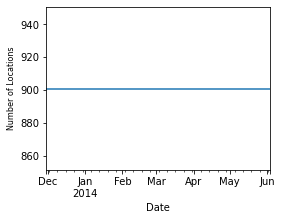

In [94]:
plt.figure(figsize=(4, 3))
wheat13_185days_nonmiss.groupby('Date').Location.count().plot()
plt.ylabel('Number of Locations', fontsize=8)
plt.savefig('./figures/date&locations(clean).png', dpi=600, bbox_inches = 'tight')

In [99]:
# 14年数据处理
wheat14 = pd.read_pickle('./data/df_2014_clean.df')

In [100]:
wheat14.groupby('Location').apply(lambda x: x.Date.max() - x.Date.min()).value_counts()

185 days    971
160 days     13
169 days     13
64 days      12
170 days      6
80 days       6
144 days      6
152 days      4
151 days      2
128 days      1
156 days      1
dtype: int64

In [103]:
days = wheat14.groupby('Location')['DayInSeason'].unique().apply(lambda x: len(x))
clean_pos = days[days==186].index.to_list()

In [104]:
wheat14_185days_nonmiss = wheat14[wheat14.Location.isin(clean_pos)]

In [105]:
wheat14_185days_nonmiss.to_pickle('./data/wheat14_185days_nonmiss.df')

Text(0, 0.5, 'Number of Locations')

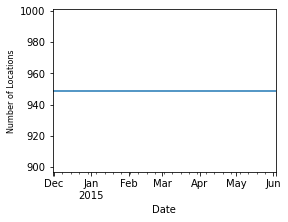

In [106]:
plt.figure(figsize=(4, 3))
wheat14_185days_nonmiss.groupby('Date').Location.count().plot()
plt.ylabel('Number of Locations', fontsize=8)
# plt.savefig('./figures/date&locations(clean).png', dpi=600, bbox_inches = 'tight')

## map

In [128]:
common_loc = wheat13_185days_nonmiss[wheat13_185days_nonmiss.Location.isin(wheat14_185days_nonmiss.Location)].Location.unique()

In [139]:
loc_13 = wheat13_185days_nonmiss[~wheat13_185days_nonmiss.Location.isin(wheat14_185days_nonmiss.Location)].Location.unique()

In [142]:
loc14 = wheat14_185days_nonmiss[~wheat14_185days_nonmiss.Location.isin(common_loc)].Location.unique()

In [149]:
common_loc[0]

(-118.6952372, 46.81168579999999)

In [171]:
import folium

m = folium.Map(
    location=[39.9, -101],
    zoom_start=4,
    zoom_control=False,
    tiles='http://webrd02.is.autonavi.com/appmaptile?lang=en&size=1&scale=1&style=8&x={x}&y={y}&z={z}',
    attr="""&copy; <a href="http://ditu.amap.com/">高德地图</a>"""
    )
# m = folium.Map(location=[39.9, -101], zoom_start=4, zoom_control=False, width='70%',height='70%')

cm_locs = folium.map.FeatureGroup(name="common locations")
# common locs 
for lng, lat, in common_loc:
    cm_locs.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=1, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='yellow',
            fill_opacity=0.4
        )
    )
m.add_child(cm_locs)

locs_14 = folium.map.FeatureGroup(name="2014 exclusive locations")
# common locs 
for lng, lat, in loc14:
    locs_14.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=1, # define how big you want the circle markers to be
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.4
        )
    )
m.add_child(locs_14)

locs_13 = folium.map.FeatureGroup(name="2013 exclusive locations")
# common locs 
for lng, lat, in loc_13:
    locs_13.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=1, # define how big you want the circle markers to be
            color='green',
            fill=True,
            fill_color='green',
            fill_opacity=0.4
        )
    )
m.add_child(locs_13)

In [173]:
from branca.element import Template, MacroElement
template = """
{% macro html(this, kwargs) %}

<!doctype html>
<html lang="en">
<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <title>jQuery UI Draggable - Default functionality</title>
  <link rel="stylesheet" href="//code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">

  <script src="https://code.jquery.com/jquery-1.12.4.js"></script>
  <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.js"></script>
  
  <script>
  $( function() {
    $( "#maplegend" ).draggable({
                    start: function (event, ui) {
                        $(this).css({
                            right: "auto",
                            top: "auto",
                            bottom: "auto"
                        });
                    }
                });
});

  </script>
</head>
<body>

 
<div id='maplegend' class='maplegend' 
    style='position: absolute; z-index:9999; border:2px solid grey; background-color:rgba(255, 255, 255, 0.8);
     border-radius:6px; padding: 10px; font-size:14px; right: 20px; bottom: 20px;'>
     
<div class='legend-title'>Legend</div>
<div class='legend-scale'>
  <ul class='legend-labels'>
    <li><span style='background:yellow;opacity:0.7;'></span>Common Locations</li>
    <li><span style='background:blue;opacity:0.7;'></span>2014 exclusive locations</li>
    <li><span style='background:green;opacity:0.7;'></span>2013 exclusive locations</li>

  </ul>
</div>
</div>
 
</body>
</html>

<style type='text/css'>
  .maplegend .legend-title {
    text-align: left;
    margin-bottom: 5px;
    font-weight: bold;
    font-size: 90%;
    }
  .maplegend .legend-scale ul {
    margin: 0;
    margin-bottom: 5px;
    padding: 0;
    float: left;
    list-style: none;
    }
  .maplegend .legend-scale ul li {
    font-size: 80%;
    list-style: none;
    margin-left: 0;
    line-height: 18px;
    margin-bottom: 2px;
    }
  .maplegend ul.legend-labels li span {
    display: block;
    float: left;
    height: 16px;
    width: 30px;
    margin-right: 5px;
    margin-left: 0;
    border: 1px solid #999;
    }
  .maplegend .legend-source {
    font-size: 80%;
    color: #777;
    clear: both;
    }
  .maplegend a {
    color: #777;
    }
</style>
{% endmacro %}"""

macro = MacroElement()
macro._template = Template(template)

m.get_root().add_child(macro)

m.save("map.htmp")

## 标准化和group

In [178]:
wheat13_185days_nonmiss.columns

Index(['CountyName', 'State', 'Latitude', 'Longitude', 'Date', 'cloudCover',
       'dewPoint', 'humidity', 'precipIntensity', 'precipProbability',
       'precipAccumulation', 'precipTypeIsRain', 'precipTypeIsSnow',
       'pressure', 'temperatureMax', 'temperatureMin', 'visibility',
       'windBearing', 'windSpeed', 'NDVI', 'DayInSeason', 'Yield', 'Location'],
      dtype='object')

In [182]:
# 删除相关性过高的列
cols_to_remove = ['State', 'Date', 'Latitude', 'Longitude', 'CountyName']
wheat13_185days_nonmiss.drop(cols_to_remove, axis=1, inplace=True)
wheat14_185days_nonmiss.drop(cols_to_remove, axis=1, inplace=True)

C:\Users\NADPH\miniconda3\envs\bishe-env\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [189]:
wheat13_185days_nonmiss.columns

Index(['cloudCover', 'dewPoint', 'humidity', 'precipIntensity',
       'precipProbability', 'precipAccumulation', 'precipTypeIsRain',
       'precipTypeIsSnow', 'pressure', 'temperatureMax', 'temperatureMin',
       'visibility', 'windBearing', 'windSpeed', 'NDVI', 'DayInSeason',
       'Yield', 'Location'],
      dtype='object')

In [263]:
wheat13_185days_nonmiss.groupby('Location').agg({'cloudCover': [list]})

,cloudCover
,list
Location,
"(-120.9140928, 45.8405591)","[0.12, 0.19, 0.03, 0.18, 0.0, 0.05, 0.4, 0.0, ..."
"(-120.73328980000001, 45.8059508)","[0.12, 0.19, 0.04, 0.21, 0.0, 0.05, 0.4, 0.0, ..."
"(-120.4850382, 45.7447958)","[0.12, 0.19, 0.04, 0.21, 0.0, 0.05, 0.39, 0.0,..."
"(-120.3476399, 45.8191414)","[0.12, 0.18, 0.03, 0.17, 0.0, 0.03, 0.39, 0.0,..."
"(-120.21484240000001, 45.977662)","[0.12, 0.17, 0.03, 0.18, 0.0, 0.03, 0.39, 0.0,..."
...,...
"(-94.68254470000001, 37.2454549)","[0.0, 0.03, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
"(-94.6718464, 38.693595)","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [268]:
agg_method = {'cloudCover': [list], 
              'dewPoint': [list], 
             'humidity':[list],
             'precipIntensity': [list],
             'precipProbability': [list],
             'precipAccumulation': [list],
             'precipTypeIsRain': [list],
             'precipTypeIsSnow': [list],
             'pressure': [list],
             'temperatureMax': [list],
             'temperatureMin':[list],
             'visibility':[list],
             'windBearing':[list],
             'windSpeed':[list],
             'NDVI':[list],
             'DayInSeason':[list],
             'Yield': ['mean']}

In [269]:
grouped_13 = wheat13_185days_nonmiss.groupby('Location').agg(agg_method).reset_index()
grouped_14 = wheat14_185days_nonmiss.groupby('Location').agg(agg_method).reset_index()

In [270]:
grouped_13.to_pickle('./data/grouped_13.df')
grouped_14.to_pickle('./data/grouped_14.df')

## 算法测试

In [2]:
df_13 = pd.read_pickle('./data/grouped_13.df')

In [3]:
df_13.columns = ['Location', 'cloudCover', 'dewPoint', 'humidity', 'precipIntensity',
       'precipProbability', 'precipAccumulation', 'precipTypeIsRain',
       'precipTypeIsSnow', 'pressure', 'temperatureMax', 'temperatureMin',
       'visibility', 'windBearing', 'windSpeed', 'NDVI', 'DayInSeason',
       'Yield']

In [4]:
df = df_13.drop(['Location', 'Yield'], axis=1).values

In [5]:
# reshape 901*2976
def reshape_data(df):
    res = []
    for row in df:
        new_row = []
        for col in row:
            new_row += col
        res.append(new_row)
    return res
# new_data = reshape_data(df)

In [24]:
new_data = np.array(new_data, dtype='float32')

In [25]:
X = new_data
y = df_13['Yield'].values

In [26]:
y = y.reshape([901,])

In [27]:
from alg_test import alg_test

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
score = alg_test(X_train, y_train)

LR:
Accuracy: -54.04 (+/- 16.01)
Exec. time:  0.08 s
LRR
Accuracy: -60.63 (+/- 10.41)
Exec. time:  0.00 s
RF:
Accuracy: -25.4691 (+/- 6.7711)
Exec. time:  2.26 s
GBR
Accuracy: -222.6729 (+/- 36.3616)
Exec. time:  0.11 s
KNN
Accuracy: -44.43 (+/- 20.95)
Exec. time:  0.16 s


In [30]:
score

,score
RFR,-25.469101
KNN,-44.432505
LR,-54.039838
LRR,-60.628945
GBR,-222.672905


In [31]:
from learning_curve import plot_learning_curve

In [34]:
from sklearn.ensemble import RandomForestRegressor
est = RandomForestRegressor(n_estimators=10, n_jobs=-1)

In [32]:
from sklearn import neighbors
est = neighbors.KNeighborsRegressor(5, weights='uniform', n_jobs=-1)
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True)

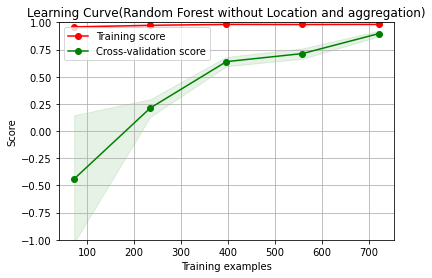

In [36]:
title = 'Learning Curve(Random Forest without Location and aggregation)'
plot_learning_curve(est, title, X, y, ylim=(-1, 1.0), cv=kf, n_jobs=4)
plt.savefig('./Forecasting of rice yields in Guangxi Province China via Bi-LSTM/figures/Learning Curve(Random Forest without Location and aggregation).png', dpi=600)
plt.show()

In [26]:
from sklearn.ensemble import RandomForestRegressor
est = RandomForestRegressor(n_estimators=10, n_jobs=-1)
est.fit(X_train, y_train)
importance = pd.DataFrame(est.feature_importances_)

In [37]:
ip = importance.rolling(window=186).sum()

In [65]:
ip.index = feature_names

In [70]:
# 数据整理后的预测贡献
ip.sort_values(0, ascending=False)

,0
pressure,0.344110
temperatureMax,0.301084
visibility,0.103511
dewPoint,0.096260
windSpeed,0.045367
NDVI,0.040877
windBearing,0.020432
humidity,0.014551
temperatureMin,0.010085
precipIntensity,0.008703


## LSTM

In [16]:
# reshape 901*186*16
def reshape_data(df):
    res = []
    for row in df:
        new_row = []
        for col in row:
            new_row.append(col)
        res.append(new_row)
    return res
ar_dt = reshape_data(df)

In [18]:
ar_dt = np.array(ar_dt, dtype='float32')

In [13]:
ar_dt = np.array([x.T for x in ar_dt])

In [104]:
pd.get_dummies(df_13.Location)

,"(-120.9140928, 45.8405591)","(-120.73328980000001, 45.8059508)","(-120.4850382, 45.7447958)","(-120.3476399, 45.8191414)","(-120.21484240000001, 45.977662)","(-120.06390379999999, 45.982346899999996)","(-119.9786868, 47.630408200000005)","(-119.9382705, 47.5489924)","(-119.89873429999999, 47.2567598)","(-119.8903779, 47.608024900000004)",...,"(-94.7699705, 38.038852899999995)","(-94.7594686, 37.0517591)","(-94.748021, 38.5648661)","(-94.7331309, 38.8046089)","(-94.7221945, 38.1499581)","(-94.68254470000001, 37.2454549)","(-94.6718464, 38.693595)","(-94.6609942, 37.8891727)","(-94.6573628, 38.0510911)","(-94.6135714, 36.402199700000004)"
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
896,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
897,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
898,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
899,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ar_dt, y, test_size=0.2, random_state=42)

In [98]:
import tensorflow as tf
print(tf.__version__)
from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model

2.0.1


In [99]:
def build_and_compile_model():
    inputs1 = tf.keras.Input(shape=(186,16),name='inputs1')
    inputs2 = tf.keras.Input(shape=(901,),name='inputs2')
    L2 = tf.keras.regularizers.l2(1e-4)
    ##############################################################################################################
    lstm1 = keras.layers.Bidirectional(
           layers.LSTM(32,  kernel_regularizer=L2,
                            recurrent_regularizer=L2,
                            bias_regularizer=L2,
                            recurrent_initializer='glorot_uniform',
                            return_sequences=True,
                            name='lstm1'),
                                        merge_mode='concat',
                                        name='Bid_1')(inputs1)
    lstm2 = keras.layers.Bidirectional(
           layers.LSTM(32,  kernel_regularizer=L2,
                            recurrent_regularizer=L2,
                            bias_regularizer=L2,
                            recurrent_initializer='glorot_uniform',
                            return_sequences=True,
                            name='lstm2'),
                                        merge_mode='concat',
                                        name='Bid_2')(lstm1)
    
    lstm3 = keras.layers.Bidirectional(
           layers.LSTM(64,  kernel_regularizer=L2,
                            recurrent_regularizer=L2,
                            bias_regularizer=L2,
                            recurrent_initializer='glorot_uniform',
                            return_sequences=False,
                            name='lstm3'),
                                        merge_mode='concat',
                                        name='Bid_3')(lstm2)    
    ##############################################################################################################
    pre = layers.Dense(     units = 1,                      
                            kernel_initializer='glorot_uniform',
                            kernel_regularizer=L2,                 
                            name='predict')(lstm3)
    ##############################################################################################################
    county_condition1 = layers.Dense(32,
                                    activation='tanh', 
                                    name='county_condition1')(inputs2)
    county_condition2 = layers.Dense(1,
                                    activation='sigmoid', 
                                    name='county_condition2')(county_condition1)
    contrl_pre = tf.multiply(pre,   county_condition2, name='contrl_pre',)   # 使用countyID 约束 预测的产量
    
    merge_model = tf.keras.Model(inputs=[inputs1,inputs2], outputs=contrl_pre, name='merge_model')
    ##############################################################################################################
    merge_model.compile( optimizer=tf.keras.optimizers.Adam(),
                         loss=tf.keras.losses.Huber(),
                         metrics = [tf.keras.metrics.mse])
    return merge_model

merge_model = build_and_compile_model()
merge_model.summary()

Model: "merge_model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs1 (InputLayer)            [(None, 186, 16)]    0                                            
__________________________________________________________________________________________________
Bid_1 (Bidirectional)           (None, 186, 64)      12544       inputs1[0][0]                    
__________________________________________________________________________________________________
Bid_2 (Bidirectional)           (None, 186, 64)      24832       Bid_1[0][0]                      
__________________________________________________________________________________________________
inputs2 (InputLayer)            [(None, 901)]        0                                            
________________________________________________________________________________________

In [ ]:
tmp = merge_model.fit(x=[ar_dt, pd.get_dummies(df_13.Location).values], y=y, epochs=1000, validation_split=0.2, validation_steps=1)

Train on 720 samples, validate on 181 samples
Epoch 1/1000
720/720 [==============================] - 17s 23ms/sample - loss: 25.3486 - mean_squared_error: 845.8368 - val_loss: 7.0479 - val_mean_squared_error: 1716.9497
Epoch 2/1000
720/720 [==============================] - 6s 8ms/sample - loss: 20.1761 - mean_squared_error: 602.1044 - val_loss: 6.1246 - val_mean_squared_error: 1324.2732
Epoch 3/1000
720/720 [==============================] - 6s 8ms/sample - loss: 15.3222 - mean_squared_error: 417.7893 - val_loss: 5.3298 - val_mean_squared_error: 1029.8235
Epoch 4/1000
720/720 [==============================] - 7s 9ms/sample - loss: 12.5303 - mean_squared_error: 300.6761 - val_loss: 4.7008 - val_mean_squared_error: 825.3638
Epoch 5/1000
720/720 [==============================] - 6s 8ms/sample - loss: 11.2703 - mean_squared_error: 237.5033 - val_loss: 4.2925 - val_mean_squared_error: 706.2011
Epoch 6/1000
720/720 [==============================] - 6s 8ms/sample - loss: 10.5879 - mean_s

## 压缩数据

In [9]:
df_13

,Location,cloudCover,dewPoint,humidity,precipIntensity,precipProbability,precipAccumulation,precipTypeIsRain,precipTypeIsSnow,pressure,temperatureMax,temperatureMin,visibility,windBearing,windSpeed,NDVI,DayInSeason,Yield
0,"(-120.9140928, 45.8405591)","[0.12, 0.19, 0.03, 0.18, 0.0, 0.05, 0.4, 0.0, ...","[32.04, 43.27, 32.82, 21.56, 12.43, 10.34, 12....","[0.87, 0.86, 0.69, 0.64, 0.65, 0.69, 0.72, 0.5...","[0.0002, 0.0269, 0.0034, 0.0003, 0.0, 0.0, 0.0...","[0.16, 0.78, 0.66, 0.23, 0.0, 0.0, 0.61, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5870000000000...","[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, ...","[1026.99, 1014.97, 1012.04, 1022.59, 1028.45, ...","[40.96, 56.73, 50.68, 38.65, 32.65, 25.98, 23....","[31.17, 37.77, 33.33, 24.18, 15.92, 12.33, 16....","[3.75, 6.05, 9.91, 9.87, 9.96, 9.87, 7.18, 9.8...","[93, 255, 280, 41, 110, 99, 70, 84, 123, 130, ...","[0.95, 6.2, 11.71, 2.5, 4.19, 5.87, 4.32, 3.24...","[133.8460236, 142.7281494, 137.5774841, 134.07...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",43.7
1,"(-120.73328980000001, 45.8059508)","[0.12, 0.19, 0.04, 0.21, 0.0, 0.05, 0.4, 0.0, ...","[30.11, 41.74, 31.67, 20.34, 11.23, 9.26, 12.2...","[0.87, 0.85, 0.67, 0.64, 0.67, 0.72, 0.74, 0.5...","[0.0, 0.0229, 0.0025, 0.0004, 0.0, 0.0, 0.0018...","[0.0, 0.79, 0.65, 0.24, 0.0, 0.0, 0.62, 0.0, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.6409999999999...","[0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1026.93, 1014.45, 1011.39, 1022.7, 1028.75, 1...","[38.83, 56.02, 50.38, 37.51, 31.51, 24.98, 22....","[29.03, 35.62, 32.09, 22.91, 13.17, 9.56, 14.8...","[3.08, 5.59, 9.95, 9.82, 9.94, 9.82, 7.19, 9.7...","[94, 268, 277, 17, 138, 148, 60, 78, 156, 136,...","[0.83, 5.87, 12.54, 2.42, 2.39, 1.79, 2.39, 1....","[133.3973389, 146.4926758, 138.7601776, 133.84...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",43.7
2,"(-120.4850382, 45.7447958)","[0.12, 0.19, 0.04, 0.21, 0.0, 0.05, 0.39, 0.0,...","[29.64, 41.23, 31.22, 19.89, 10.65, 8.58, 11.4...","[0.87, 0.85, 0.66, 0.63, 0.67, 0.72, 0.73, 0.5...","[0.0, 0.0201, 0.0021, 0.0004, 0.0, 0.0, 0.0015...","[0.0, 0.77, 0.63, 0.19, 0.0, 0.0, 0.59, 0.0, 0...","[0.0, 0.0, 0.0, 0.078, 0.0, 0.0, 0.534, 0.0, 0...","[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1026.94, 1014.33, 1011.16, 1022.64, 1028.72, ...","[38.31, 55.5, 50.53, 36.8, 30.8, 24.67, 22.56,...","[28.81, 34.95, 31.74, 22.19, 12.18, 8.71, 14.0...","[3.0, 5.6, 9.96, 9.77, 9.94, 9.8, 7.62, 9.83, ...","[89, 263, 274, 11, 144, 153, 59, 58, 158, 138,...","[0.76, 5.96, 12.66, 2.67, 2.26, 1.76, 2.72, 1....","[133.3973389, 143.8201752, 138.5752869, 135.38...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",43.7
3,"(-120.3476399, 45.8191414)","[0.12, 0.18, 0.03, 0.17, 0.0, 0.03, 0.39, 0.0,...","[29.16, 41.0, 30.25, 18.58, 9.94, 7.89, 10.04,...","[0.88, 0.83, 0.63, 0.62, 0.68, 0.73, 0.7, 0.5,...","[0.0, 0.0149, 0.0014, 0.0003, 0.0, 0.0, 0.001,...","[0.0, 0.73, 0.57, 0.1, 0.0, 0.0, 0.54, 0.0, 0....","[0.0, 0.0, 0.0, 0.066, 0.0, 0.0, 0.348, 0.0, 0...","[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1027.08, 1014.01, 1010.76, 1022.58, 1028.81, ...","[37.36, 55.67, 51.28, 36.25, 29.66, 24.57, 22....","[28.83, 33.73, 32.23, 21.09, 10.98, 7.16, 12.7...","[2.92, 6.13, 9.97, 9.73, 9.95, 9.82, 8.3, 9.86...","[13, 249, 270, 358, 139, 111, 37, 17, 171, 122...","[0.39, 6.65, 12.16, 4.67, 1.58, 0.58, 3.99, 2....","[132.891098, 147.44480900000002, 138.603759800...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",43.7
4,"(-120.21484240000001, 45.977662)","[0.12, 0.17, 0.03, 0.18, 0.0, 0.03, 0.39, 0.0,...","[28.71, 40.48, 29.67, 18.08, 9.6, 7.5, 9.35, -...","[0.88, 0.82, 0.62, 0.61, 0.68, 0.74, 0.68, 0.4...","[0.0, 0.0128, 0.0011, 0.0003, 0.0, 0.0, 0.0008...","[0.0, 0.71, 0.53, 0.08, 0.0, 0.0, 0.5, 0.0, 0....","[0

In [14]:
def tmp_func(x:list):
    res = []
    tmp = []
    for i in x:
        if len(tmp) == 60:
            res.append(np.mean(tmp))
            tmp.clear()
        else:
            tmp.append(i)
    return res
tmp = df_13.drop(['Location', 'Yield'], axis=1).applymap(tmp_func)

In [22]:
new_data = reshape_data(tmp.values)

In [23]:
new_data = np.array(new_data).shape

(901, 48)